Ноутбук с анализом временного ряда с использованием библиотеки Tensorflow

- Tensorflow для начинающих: 
https://www.tensorflow.org/tutorials/quickstart/beginner

- Tutorial по работе с временными данными в Tensorflow:
https://www.tensorflow.org/tutorials/structured_data/time_series

Часть 1. LSTM для задачи Регрессии

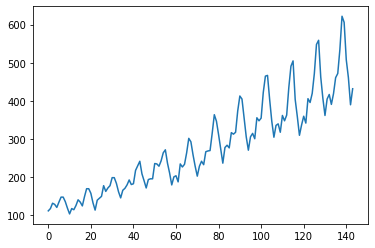

In [ ]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

In [ ]:
# load the dataset
dataframe = pandas.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]]
Train Y: 

[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
 0.08494207]


In [ ]:
print(trainX.shape, trainY.shape)

(94, 1) (94,)


In [ ]:
print(testX.shape, testY.shape)

(46, 1) (46,)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0495
Epoch 2/100
94/94 - 0s - loss: 0.0242
Epoch 3/100
94/94 - 0s - loss: 0.0169
Epoch 4/100
94/94 - 0s - loss: 0.0154
Epoch 5/100
94/94 - 0s - loss: 0.0144
Epoch 6/100
94/94 - 0s - loss: 0.0135
Epoch 7/100
94/94 - 0s - loss: 0.0124
Epoch 8/100
94/94 - 0s - loss: 0.0113
Epoch 9/100
94/94 - 0s - loss: 0.0106
Epoch 10/100
94/94 - 0s - loss: 0.0093
Epoch 11/100
94/94 - 0s - loss: 0.0082
Epoch 12/100
94/94 - 0s - loss: 0.0072
Epoch 13/100
94/94 - 0s - loss: 0.0063
Epoch 14/100
94/94 - 0s - loss: 0.0054
Epoch 15/100
94/94 - 0s - loss: 0.0047
Epoch 16/100
94/94 - 0s - loss: 0.0040
Epoch 17/100
94/94 - 0s - loss: 0.0035
Epoch 18/100
94/94 - 0s - loss: 0.0030
Epoch 19/100
94/94 - 0s - loss: 0.0027
Epoch 20/100
94/94 - 0s - loss: 0.0025
Epoch 21/100
94/94 - 0s - loss: 0.0023
Epoch 22/100
94/94 - 0s - loss: 0.0022
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.71 RMSE
Test Score: 49.07 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

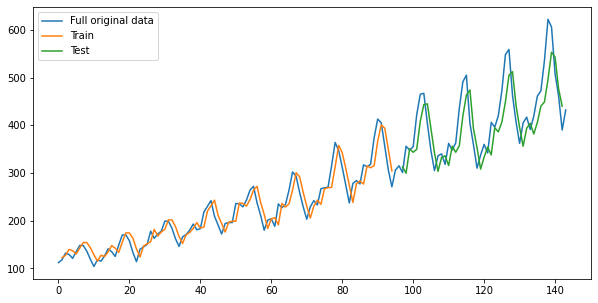

In [ ]:
# plot baseline and predictions
plt.figure(figsize = (10,5))
plt.plot(scaler.inverse_transform(dataset), label = 'Full original data')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend()
plt.show()

Часть 2. LSTM для Регрессии с использованием оконного метода

In [ ]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[[0.01544401 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]

 [[0.05405405 0.04826255 0.03281853]]

 [[0.04826255 0.03281853 0.05984557]]

 [[0.03281853 0.05984557 0.08494207]]

 [[0.05984557 0.08494207 0.08494207]]

 [[0.08494207 0.08494207 0.06177607]]]
Train Y: 

[0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
 0.02895753]


In [ ]:
print(trainX.shape, trainY.shape)

(92, 1, 3) (92,)


In [ ]:
print(testX.shape, testY.shape)

(44, 1, 3) (44,)


Epoch 1/100
92/92 - 1s - loss: 0.0345
Epoch 2/100
92/92 - 0s - loss: 0.0152
Epoch 3/100
92/92 - 0s - loss: 0.0108
Epoch 4/100
92/92 - 0s - loss: 0.0094
Epoch 5/100
92/92 - 0s - loss: 0.0085
Epoch 6/100
92/92 - 0s - loss: 0.0077
Epoch 7/100
92/92 - 0s - loss: 0.0069
Epoch 8/100
92/92 - 0s - loss: 0.0063
Epoch 9/100
92/92 - 0s - loss: 0.0057
Epoch 10/100
92/92 - 0s - loss: 0.0052
Epoch 11/100
92/92 - 0s - loss: 0.0049
Epoch 12/100
92/92 - 0s - loss: 0.0046
Epoch 13/100
92/92 - 0s - loss: 0.0044
Epoch 14/100
92/92 - 0s - loss: 0.0042
Epoch 15/100
92/92 - 0s - loss: 0.0041
Epoch 16/100
92/92 - 0s - loss: 0.0040
Epoch 17/100
92/92 - 0s - loss: 0.0039
Epoch 18/100
92/92 - 0s - loss: 0.0037
Epoch 19/100
92/92 - 0s - loss: 0.0037
Epoch 20/100
92/92 - 0s - loss: 0.0036
Epoch 21/100
92/92 - 0s - loss: 0.0035
Epoch 22/100
92/92 - 0s - loss: 0.0034
Epoch 23/100
92/92 - 0s - loss: 0.0033
Epoch 24/100
92/92 - 0s - loss: 0.0033
Epoch 25/100
92/92 - 0s - loss: 0.0031
Epoch 26/100
92/92 - 0s - loss: 0.

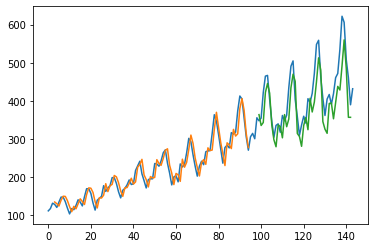

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM для регрессии с  Time Steps

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
print('Train X: \n')
print(trainX[:7])
print('Train Y: \n')
print(trainY[:7])

Train X: 

[[[0.01544401]
  [0.02702703]
  [0.05405405]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.04826255]
  [0.03281853]
  [0.05984557]]

 [[0.03281853]
  [0.05984557]
  [0.08494207]]

 [[0.05984557]
  [0.08494207]
  [0.08494207]]

 [[0.08494207]
  [0.08494207]
  [0.06177607]]]
Train Y: 

[0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
 0.02895753]


In [ ]:
print(trainX.shape, trainY.shape)

(92, 3, 1) (92,)


In [ ]:
print(testX.shape, testY.shape)

(44, 3, 1) (44,)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Epoch 1/100
92/92 - 1s - loss: 0.0814
Epoch 2/100
92/92 - 0s - loss: 0.0350
Epoch 3/100
92/92 - 0s - loss: 0.0253
Epoch 4/100
92/92 - 0s - loss: 0.0225
Epoch 5/100
92/92 - 0s - loss: 0.0201
Epoch 6/100
92/92 - 0s - loss: 0.0182
Epoch 7/100
92/92 - 0s - loss: 0.0164
Epoch 8/100
92/92 - 0s - loss: 0.0146
Epoch 9/100
92/92 - 0s - loss: 0.0130
Epoch 10/100
92/92 - 0s - loss: 0.0114
Epoch 11/100
92/92 - 0s - loss: 0.0097
Epoch 12/100
92/92 - 0s - loss: 0.0084
Epoch 13/100
92/92 - 0s - loss: 0.0072
Epoch 14/100
92/92 - 0s - loss: 0.0063
Epoch 15/100
92/92 - 0s - loss: 0.0055
Epoch 16/100
92/92 - 0s - loss: 0.0049
Epoch 17/100
92/92 - 0s - loss: 0.0046
Epoch 18/100
92/92 - 0s - loss: 0.0043
Epoch 19/100
92/92 - 0s - loss: 0.0043
Epoch 20/100
92/92 - 0s - loss: 0.0044
Epoch 21/100
92/92 - 0s - loss: 0.0045
Epoch 22/100
92/92 - 0s - loss: 0.0042
Epoch 23/100
92/92 - 0s - loss: 0.0042
Epoch 24/100
92/92 - 0s - loss: 0.0042
Epoch 25/100
92/92 - 0s - loss: 0.0041
Epoch 26/100
92/92 - 0s - loss: 0.

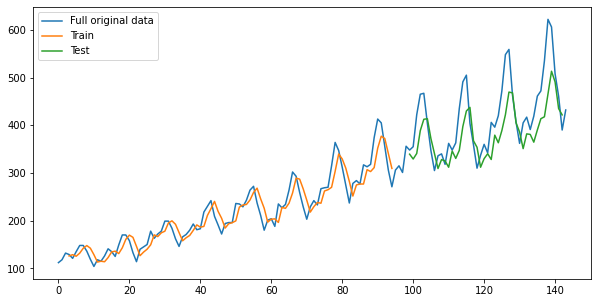

In [ ]:
# plot baseline and predictions
plt.figure(figsize = (10,5))
plt.plot(scaler.inverse_transform(dataset), label = 'Full original data')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend()
plt.show()

- Tensorflow для начинающих: 
https://www.tensorflow.org/tutorials/quickstart/beginner

- Tutorial по работе с временными данными в Tensorflow:
https://www.tensorflow.org/tutorials/structured_data/time_series